In [41]:
%pip install matplotlib[complete]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# load the preprocessed data from the csv generated from datapreproc.ipynb
file_path = r"C:\Users\raaja\OneDrive\Documents\maichu development\notebooks\merged_data_with_labels.csv"
df = pd.read_csv(file_path)



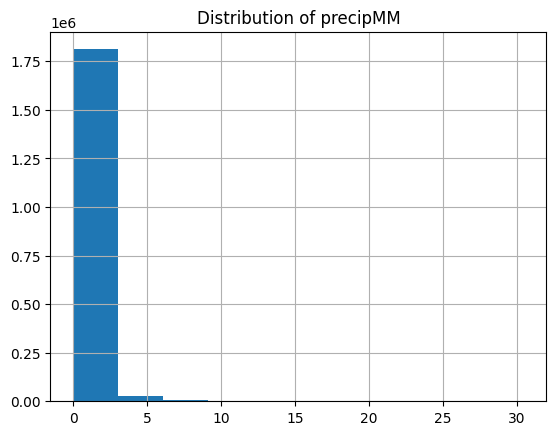

Column: precipMM
Mean: 0.25695768041671424
Median: 0.0
Standard Deviation: 0.983122755578555
----


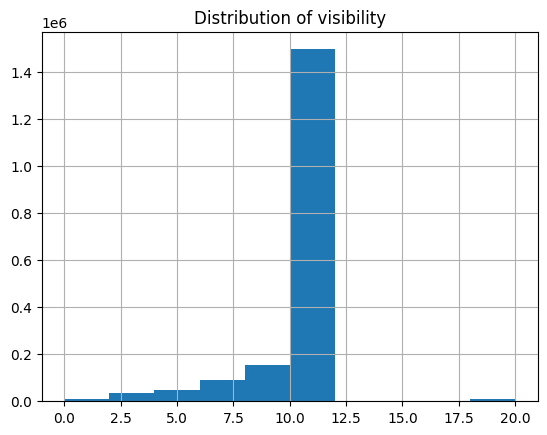

Column: visibility
Mean: 9.427997511121097
Median: 10.0
Standard Deviation: 1.8437336413706051
----


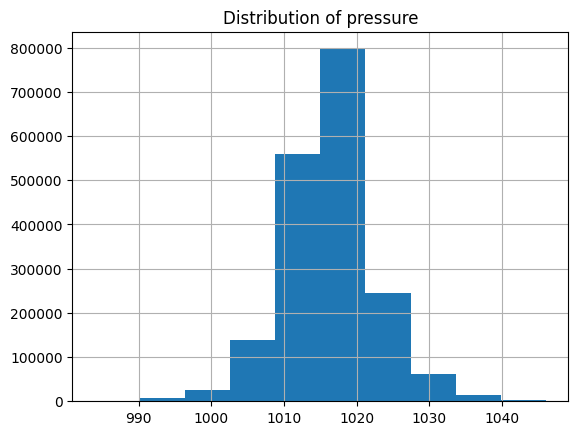

Column: pressure
Mean: 1016.1452218710234
Median: 1016.0
Standard Deviation: 6.314680469283527
----


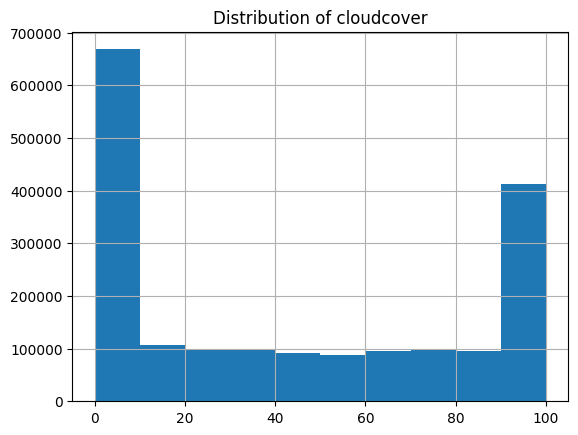

Column: cloudcover
Mean: 42.67159977444535
Median: 34.0
Standard Deviation: 39.67196005681686
----


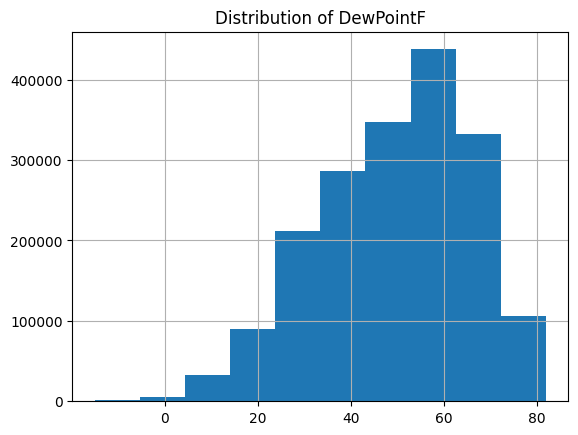

Column: DewPointF
Mean: 49.36087015700246
Median: 51.0
Standard Deviation: 16.13899534958075
----


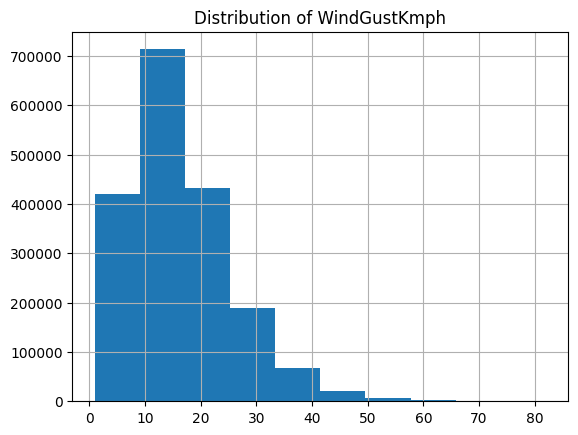

Column: WindGustKmph
Mean: 16.652302861130494
Median: 15.0
Standard Deviation: 8.998970343083496
----


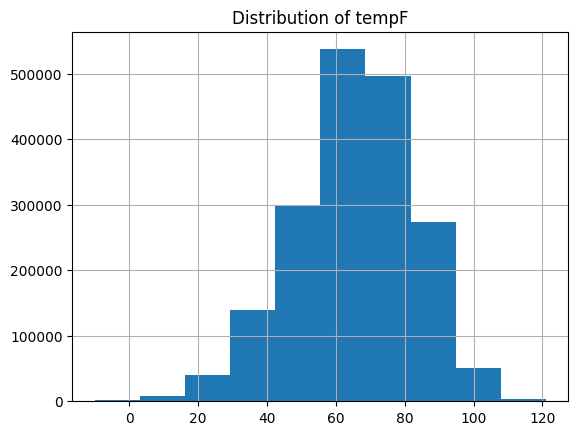

Column: tempF
Mean: 65.32258311926526
Median: 66.0
Standard Deviation: 17.1345873742926
----


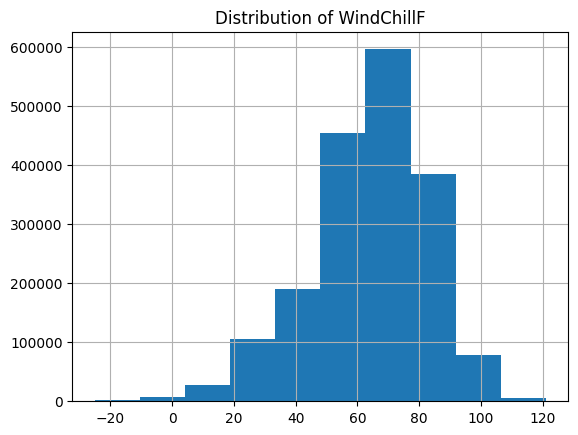

Column: WindChillF
Mean: 63.93729083803059
Median: 66.0
Standard Deviation: 19.032710606345894
----


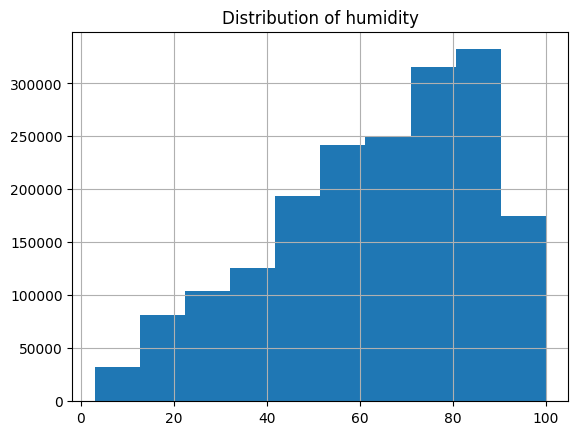

Column: humidity
Mean: 63.33680775354914
Median: 67.0
Standard Deviation: 22.43380819081832
----


In [40]:

numerical_cols = ["precipMM", "visibility", "pressure", "cloudcover", "DewPointF", "WindGustKmph", "tempF", "WindChillF", "humidity"]

for col in numerical_cols:
  # explore distribution with histogram
  df[col].hist()
  plt.title(f"Distribution of {col}")
  plt.show()

  # calculate summary statistics
  print(f"Column: {col}")
  print(f"Mean: {df[col].mean()}")
  print(f"Median: {df[col].median()}")
  print(f"Standard Deviation: {df[col].std()}")
  print("----")


In [24]:
weather_cols = ['windspeedKmph', 'winddirDegree', 'precipMM', 'visibility', 'pressure', 
                'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity']

correlationsDep = {col: df['DepDelayMinutes'].corr(df[col]) for col in weather_cols}
correlationsArr = {col: df['ArrDelayMinutes'].corr(df[col]) for col in weather_cols}

print("Departure correlations")

for correl, value in correlationsDep.items():
  print(f"{correl}: {value}")
  print()  # Add a newline after each correlation

print("Arrival correlations")  

for correl, value in correlationsArr.items():
  print(f"{correl}: {value}")
  print()  # Add a newline after each correlation

Departure correlations
windspeedKmph: 0.0720238488159469

winddirDegree: 0.01231505863840986

precipMM: 0.08183326668165525

visibility: -0.01887150781345903

pressure: -0.052155166867177014

cloudcover: 0.031280441466947306

DewPointF: 0.03807244656506428

WindGustKmph: 0.07101668007602406

tempF: 0.030153747751616028

WindChillF: 0.027843084490053426

humidity: 0.003653702532908162

Arrival correlations
windspeedKmph: 0.07491844989521426

winddirDegree: 0.011019556482758222

precipMM: 0.0877686014620802

visibility: -0.024327273431318016

pressure: -0.061035123447934374

cloudcover: 0.036692452919150235

DewPointF: 0.04013625701874874

WindGustKmph: 0.07516057580491604

tempF: 0.031564375738976316

WindChillF: 0.028980149821714936

humidity: 0.005641767185023687



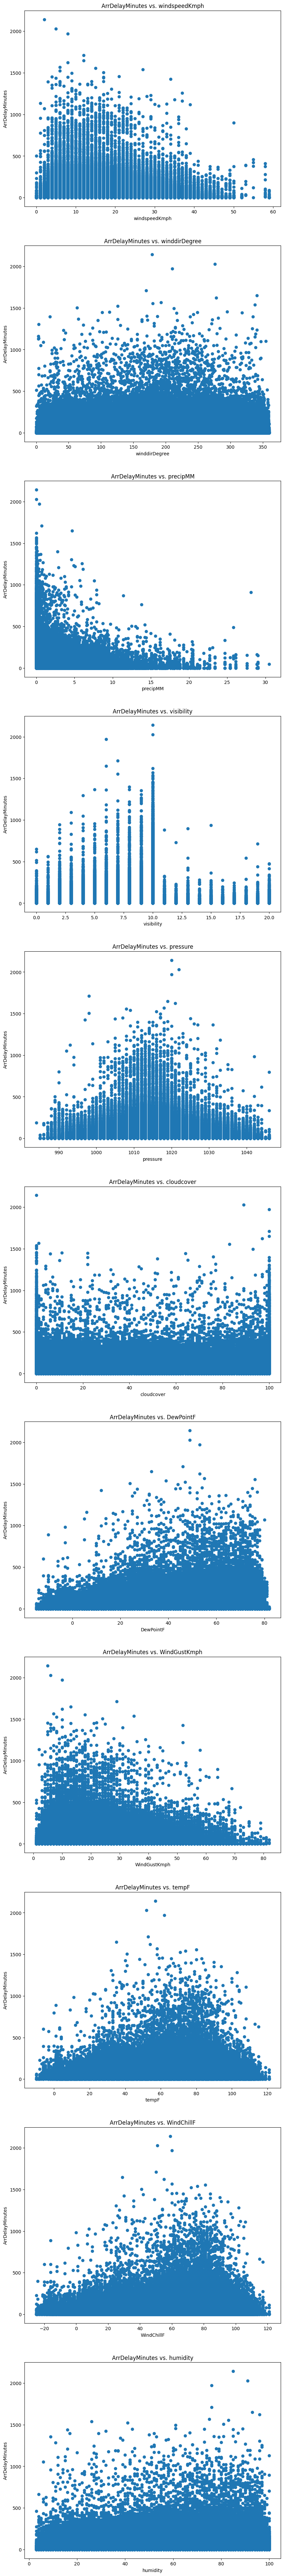

In [37]:
weather_cols = ['windspeedKmph', 'winddirDegree', 'precipMM', 'visibility', 'pressure', 
                'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity']

# create a figure for multiple subplots 
fig, axes = plt.subplots(nrows=len(weather_cols), ncols=1, figsize=(10, 100))  # Adjust figsize as needed

# iterate through weather columns and create scatter plots
for i, col in enumerate(weather_cols):
  axes[i].scatter(df[col], df['ArrDelayMinutes'])  # Scatter plot for each column
  axes[i].set_title(f"ArrDelayMinutes vs. {col}")  # Set title
  axes[i].set_ylabel("ArrDelayMinutes")  # Set x-axis label
  axes[i].set_xlabel(col)  # Set y-axis label


plt.show()